<a href="https://colab.research.google.com/github/brunorchaves/HandGestureClassifier/blob/main/HandGestureRecognitionModelTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

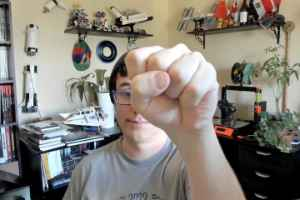

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

!wget -q -O photo.jpg https://storage.googleapis.com/mediapipe-demo/fist.jpg

img = cv2.imread("photo.jpg")
cv2_imshow(img)

In [ ]:
!wget -q -O rps.zip https://storage.googleapis.com/mediapipe-tasks/gesture_recognizer/rps_data_sample.zip
!unzip -qq rps.zip

replace rps_data_sample/paper/77.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace rps_data_sample/paper/837.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


['pinch', 'scissors', 'none', 'rock', 'paper']


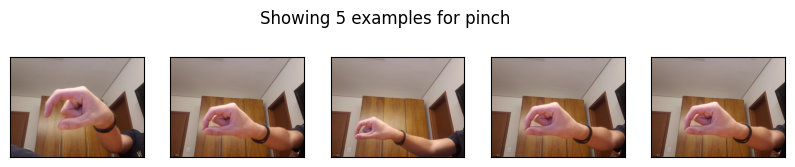

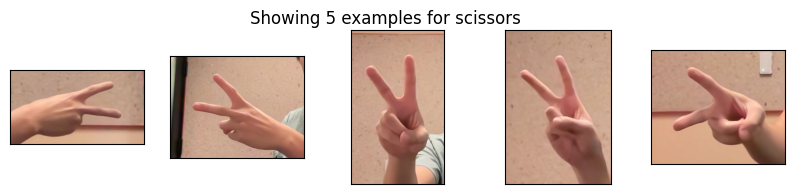

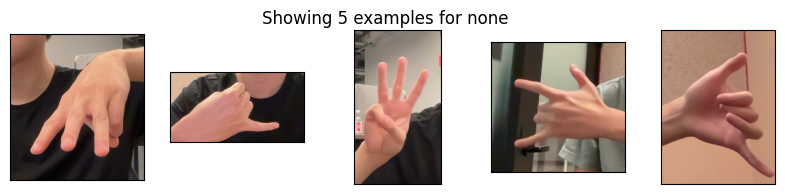

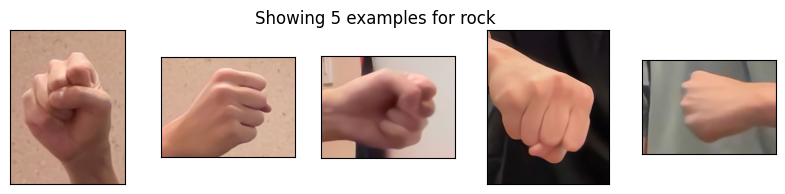

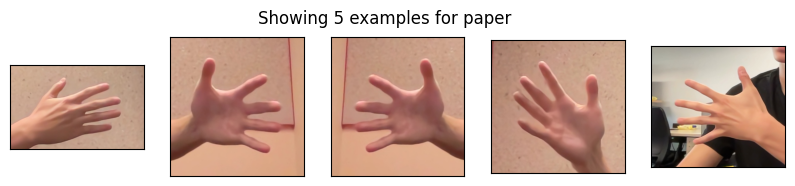

In [ ]:
import matplotlib.pyplot as plt
import os

NUM_EXAMPLES = 5
IMAGES_PATH = "/content/rps_data_sample"

# Get the list of labels from the list of folder names.
labels = []
for i in os.listdir(IMAGES_PATH):
  if os.path.isdir(os.path.join(IMAGES_PATH, i)):
    labels.append(i)

labels = [item for item in labels if item != '.ipynb_checkpoints']

print(labels)
# Show the images.
for label in labels:
  label_dir = os.path.join(IMAGES_PATH, label)
  example_filenames = os.listdir(label_dir)[:NUM_EXAMPLES]
  fig, axs = plt.subplots(1, NUM_EXAMPLES, figsize=(10,2))
  for i in range(NUM_EXAMPLES):
    axs[i].imshow(plt.imread(os.path.join(label_dir, example_filenames[i])))
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
  fig.suptitle(f'Showing {NUM_EXAMPLES} examples for {label}')

plt.show()

## Making a New Model



In [ ]:
!pip install -q mediapipe-model-maker

In [ ]:
# Import the necessary modules.
from mediapipe_model_maker import gesture_recognizer

In [ ]:
# Load the rock-paper-scissor image archive.
data = gesture_recognizer.Dataset.from_folder(
    dirname=IMAGES_PATH,
    hparams=gesture_recognizer.HandDataPreprocessingParams()
)

# Split the archive into training, validation and test dataset.
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

Using existing files at /tmp/model_maker/gesture_recognizer/palm_detection_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/hand_landmark_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/gesture_embedder


In [ ]:
# Train the model
hparams = gesture_recognizer.HParams(export_dir="newModel")
options = gesture_recognizer.GestureRecognizerOptions(hparams=hparams)
model = gesture_recognizer.GestureRecognizer.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options
)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hand_embedding (InputLayer)  [(None, 128)]            0         
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 re_lu_3 (ReLU)              (None, 128)               0         
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 custom_gesture_recognizer_o  (None, 6)                774       
 ut (Dense)                                                      
                                                                 
Total params: 1,286
Trainable params: 1,030
Non-trainable p

In [ ]:
loss, acc = model.evaluate(test_data, batch_size=1)
print(f"Test loss:{loss}, Test accuracy:{acc}")

58/58 [==============================] - 1s 2ms/step - loss: 0.2846 - categorical_accuracy: 0.8103
Test loss:0.28455185890197754, Test accuracy:0.8103448152542114


In [ ]:
# Export the model bundle.
model.export_model()

# Rename the file to be more descriptive.
!mv newModel/gesture_recognizer.task newModel.task

Using existing files at /tmp/model_maker/gesture_recognizer/gesture_embedder.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/palm_detection_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/hand_landmark_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/canned_gesture_classifier.tflite


In [ ]:
from google.colab import files
files.download("newModel.task")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

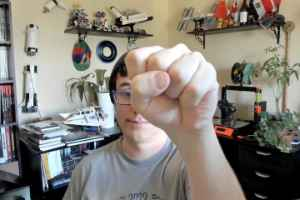

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread("photo.jpg")
cv2_imshow(img)

In [ ]:
# Imports neccessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# Create a GestureRecognizer object.
model_path = os.path.abspath("newModel.task")
recognizer = vision.GestureRecognizer.create_from_model_path(model_path)

# Load the input image.
image = mp.Image.create_from_file('photo.jpg')

# Run gesture recognition.
recognition_result = recognizer.recognize(image)

# Display the most likely gesture.
top_gesture = recognition_result.gestures[0][0]
print(f"Gesture recognized: {top_gesture.category_name} ({top_gesture.score})")

Gesture recognized: pinch (0.7464104294776917)
